## Model Iterations:

Using a combination of governance characteristics and organizational characteristics (revenue, assets, ect.) I will predict the salary of Directors & Trustees.

#### Table of Contents:

1. [Import Data](#IMPORT)
1. [Multinomial Logistic](#multinomial)
1. [Random Forest Classifier](#random_forest)
1. [Gradient Boost Classifier](#gbc)
1. [Support Vector Classifier](#svc)
1. [Summary Results](#results)


<!-- 
1. [HIERARCHICAL](#Hierarchical)
1. [CONCLUSTION/NEXT STEPS](#Conclusion) -->

In [272]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# plt.style.use('bmh')
# import warnings
# from pandas.core.common import SettingWithCopyWarning
# warnings.simplefilter(action="ignore", category=[SettingWithCopyWarning])
# warnings.simplefilter(action="ignore", category=[FutureWarning])

import jenkspy
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [26]:
# import time start_time = time.time() model() end_time = time.time()
# time_taken = end_time - start_time

## IMPORT DATA

In [439]:
# import modeling dataset
features = pd.get_dummies(pd.read_csv('02.data/model_dataset_features_eng.csv'))

y = pd.read_csv('02.data/target_categories.csv', header=None, squeeze=True)

In [440]:
X = features.drop('reportable_comp', axis=1)

In [441]:
# verify the size of target and
# feature datasets are the same
X.shape[0] == y.shape[0]

True

## MODEL ITERATIONS

### Multinomial Logistic
<a id='multinomial'></a>

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [444]:
log_clf = LogisticRegression().fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [445]:
log_clf.score(X_test, y_test)

0.18690619424967847

In [446]:
X_test['pred'] = log_clf.predict(X_test)
X_test['actual'] = y_test

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [447]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(X_test.actual, X_test.pred) / \
confusion_matrix(X_test.actual, X_test.pred).sum(axis=1, keepdims=True)

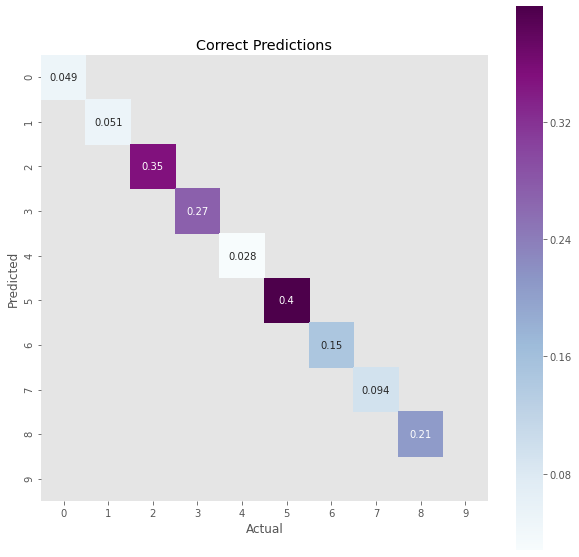

In [448]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(pd.DataFrame(np.diagflat(np.diagonal(pd.DataFrame(norm_conf_matrix)))).replace(0, np.nan),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Correct Predictions');

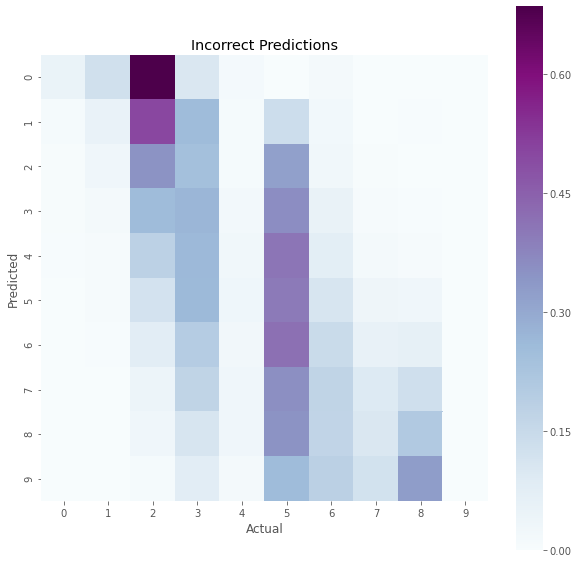

In [449]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))
np.fill_diagonal(norm_conf_matrix, 0)

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=False, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual');
plt.title('Incorrect Predictions');

It's unusual that the model did so poorly with classes 4, 8, and 9.

## Random Forest Classifier
<a id='random_forest'></a>

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [451]:
rfc = ensemble.RandomForestClassifier()

# cross_val_score(rfc, X, y, cv=5)

In [452]:
rfc.fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [453]:
rfc.score(X_test, y_test)

0.23171389453594987

In [454]:
X_test['pred'] = rfc.predict(X_test)
X_test['actual'] = y_test

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [455]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(X_test.actual, X_test.pred) / \
confusion_matrix(X_test.actual, X_test.pred).sum(axis=1, keepdims=True)

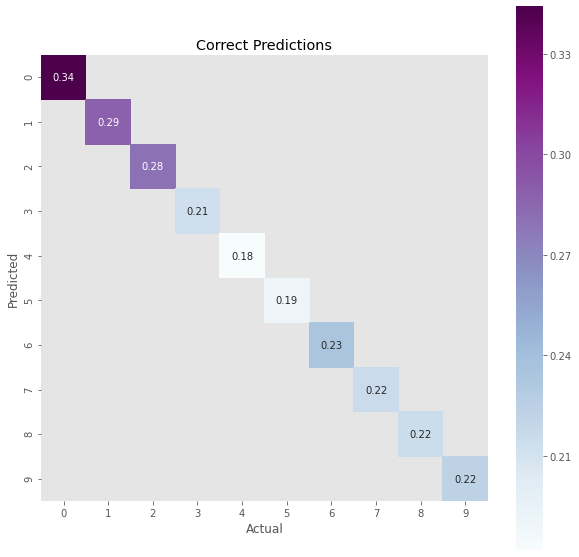

In [456]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(pd.DataFrame(np.diagflat(np.diagonal(pd.DataFrame(norm_conf_matrix)))).replace(0, np.nan),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Correct Predictions');

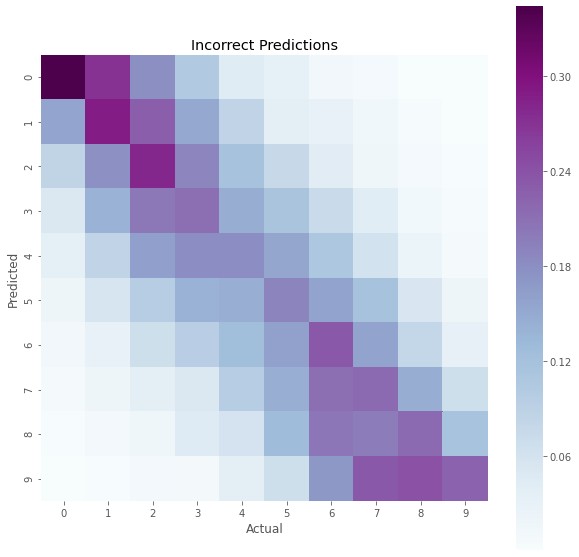

In [457]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))
np.fill_diagonal(norm_conf_matrix, 0)

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=False, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual');
plt.title('Incorrect Predictions');

In [458]:
f_importances = pd.Series(rfc.feature_importances_, 
          X_train.columns).sort_values(ascending=False)

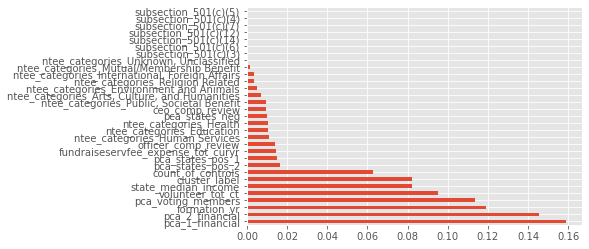

In [459]:
f_importances.plot(kind='barh');

With the sharp decrease below 5%, I will exclude all features below that level.

In [460]:
f_importances[f_importances > .05].index

Index(['pca_1_financial', 'pca_2_financial', 'formation_yr',
       'pca_voting_members', 'volunteer_tot_ct', 'state_median_income',
       'cluster_label', 'count_of_controls'],
      dtype='object')

### Random Forest Classifier 2nd Iteration - selecting only the top features

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X[f_importances[f_importances > .05].index]
                                                    , y, test_size = 0.2)

In [462]:
rfc = ensemble.RandomForestClassifier()

# cross_val_score(rfc, X, y, cv=5)

In [463]:
rfc.fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [464]:
rfc.score(X_test, y_test)

0.23353939343650168

In [465]:
X_test['pred'] = rfc.predict(X_test)
X_test['actual'] = y_test

In [466]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(X_test.actual, X_test.pred) / \
confusion_matrix(X_test.actual, X_test.pred).sum(axis=1, keepdims=True)

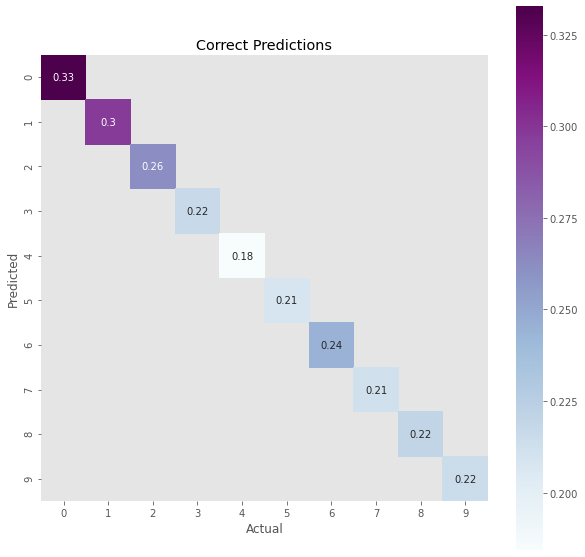

In [467]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(pd.DataFrame(np.diagflat(np.diagonal(pd.DataFrame(norm_conf_matrix)))).replace(0, np.nan),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Correct Predictions');

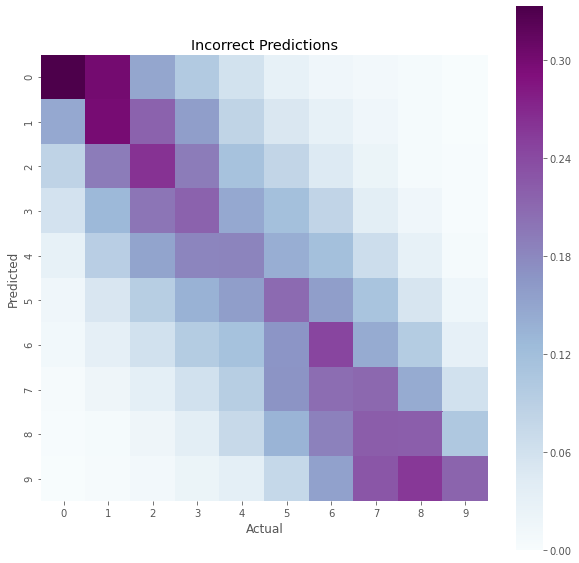

In [468]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))
np.fill_diagonal(norm_conf_matrix, 0)

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=False, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual');
plt.title('Incorrect Predictions');

In [469]:
f_importances = pd.Series(rfc.feature_importances_, 
          X_train.columns).sort_values(ascending=False)

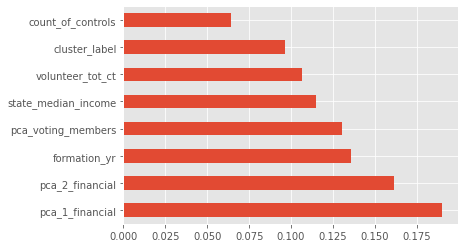

In [470]:
f_importances.plot(kind='barh');

Reducing features had limited impact on my model performance.

## Gradient Boost Classifier
<a id='gbc'></a>

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [472]:
gbc = ensemble.GradientBoostingClassifier()

In [473]:
# cross_val_score(gbc, X, y, cv=5)

In [474]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [475]:
gbc.score(X_test, y_test)

0.2391403559722856

In [476]:
X_test['pred'] = gbc.predict(X_test)
X_test['actual'] = y_test

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [477]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(X_test.actual, X_test.pred) / \
confusion_matrix(X_test.actual, X_test.pred).sum(axis=1, keepdims=True)

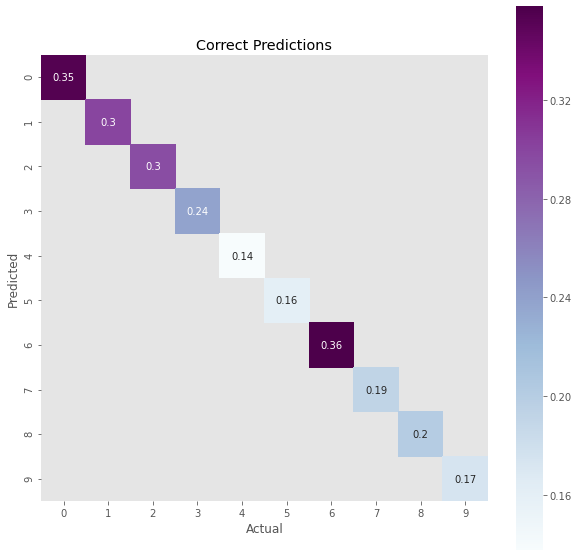

In [478]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(pd.DataFrame(np.diagflat(np.diagonal(pd.DataFrame(norm_conf_matrix)))).replace(0, np.nan),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Correct Predictions');

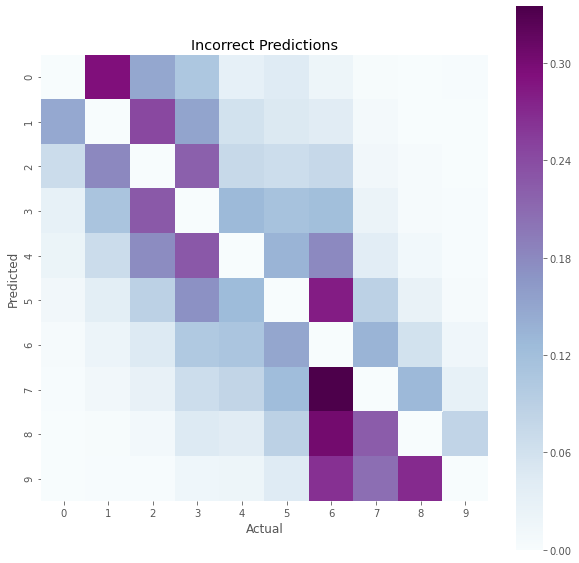

In [482]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))
np.fill_diagonal(norm_conf_matrix, 0)

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=False, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual');
plt.title('Incorrect Predictions');

GBR struggles about the same amount as SVC and Logistic Multinomial Classifier.

In [480]:
f_importances = pd.Series(gbc.feature_importances_, 
          X_train.columns).sort_values(ascending=False)

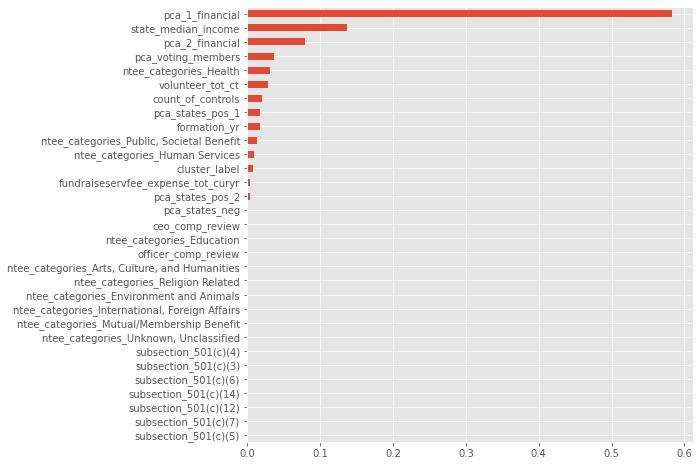

In [481]:
f_importances.sort_values().plot(kind='barh', figsize=(8, 8));

GBC relies much more heavily on only a few features.

### Gradient Boost 2nd Iteration - selecting only the top features.

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X[f_importances[f_importances > .05].index]
                                                    , y, test_size = 0.2)

In [268]:
gbc = ensemble.GradientBoostingClassifier()

In [269]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [270]:
gbc.score(X_test, y_test)

0.27505338769171034

Reducing features to only the top 5 hurt gradient boost performance.

<a id='svc'></a>
## Support Vector Classifier
This is taking forever, I should subset features then model.

In [282]:
scaler = StandardScaler()
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

# must convert to array and reshape
# otherwise error message
# y = sc_y.fit_transform(np.array(y).reshape(-1, 1))

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [284]:
svc = SVC(kernel='rbf')

In [206]:
# svr.fit(X_train, y_train)

In [271]:
# cross_val_score(svr, X, y, cv=3)

In [286]:
svc.fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [287]:
svc.score(X_test, y_test)

0.23459522422830517

SVC has performed worse than any of the other models.

In [292]:
pred = svc.predict(X_test)
actual = y_test

In [293]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(actual, pred) / \
confusion_matrix(actual, pred).sum(axis=1, keepdims=True)

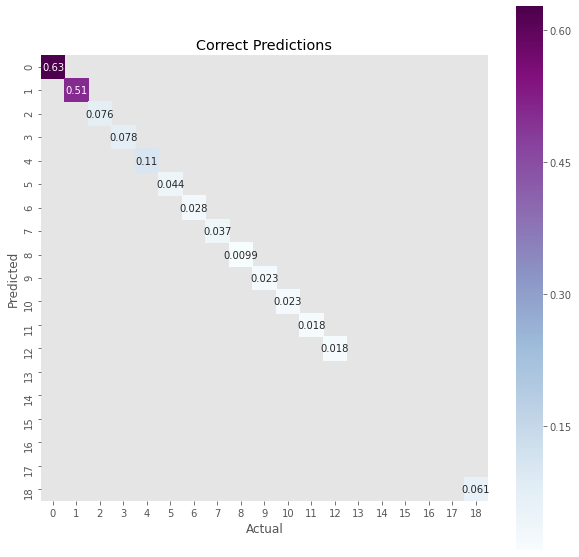

In [295]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(pd.DataFrame(np.diagflat(np.diagonal(pd.DataFrame(norm_conf_matrix)))).replace(0, np.nan),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Correct Predictions');

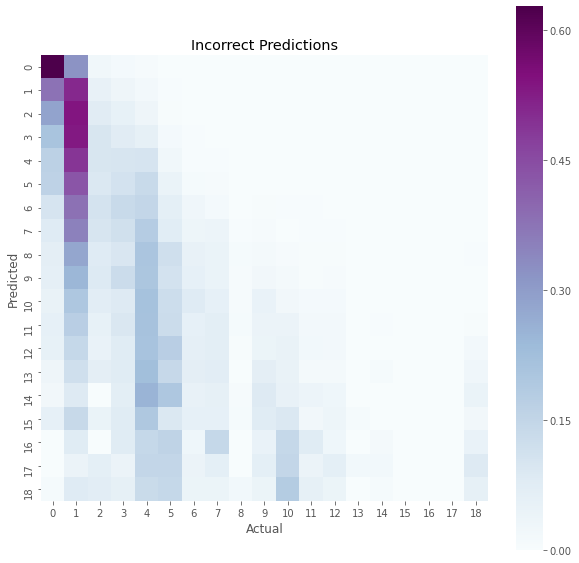

In [296]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))
np.fill_diagonal(norm_conf_matrix, 0)

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=False, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual');
plt.title('Incorrect Predictions');

Interesting how SVC struggled most with classifiction for categories on the smaller end of the spectrum.

In [300]:
X.columns

Index(['pca_voting_members', 'pca_1_financial', 'pca_2_financial',
       'formation_yr', 'state_median_income', 'volunteer_tot_ct',
       'fundraiseservfee_expense_tot_curyr', 'ceo_comp_review',
       'officer_comp_review', 'count_of_controls', 'cluster_label',
       'subsection_501(c)(3)', 'subsection_501(c)(6)', 'subsection_501(c)(5)',
       'subsection_501(c)(14)', 'subsection_501(c)(12)',
       'subsection_501(c)(4)', 'subsection_501(c)(7)', 'pca_states',
       'ntee_categories_Arts, Culture, and Humanities',
       'ntee_categories_Education', 'ntee_categories_Environment and Animals',
       'ntee_categories_Health', 'ntee_categories_Human Services',
       'ntee_categories_International, Foreign Affairs',
       'ntee_categories_Mutual/Membership Benefit',
       'ntee_categories_Public, Societal Benefit',
       'ntee_categories_Religion Related',
       'ntee_categories_Unknown, Unclassified'],
      dtype='object')

In [301]:
f_importances = pd.Series(svc.feature_importances_, 
          X.columns).sort_values(ascending=False)

AttributeError: 'SVC' object has no attribute 'feature_importances_'

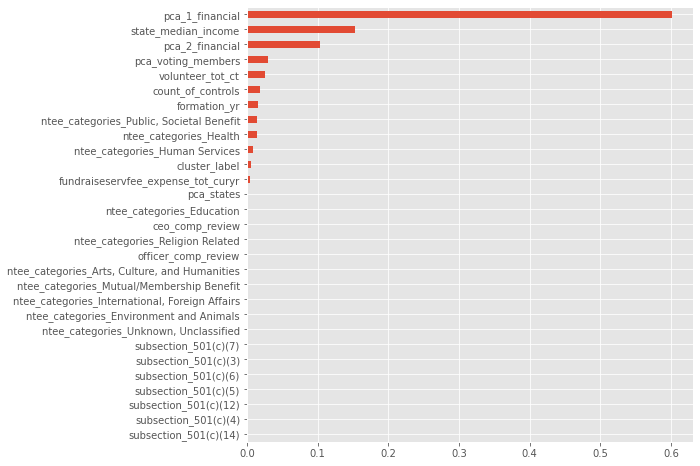

In [266]:
# f_importances.sort_values().plot(kind='barh', figsize=(8, 8));

## Once I have my best model - ROC curve examining specific categories, can I understand why the model is struggling on certain categories?

### Examine probability of assignment

In [251]:
pd.DataFrame(rfc.predict_proba(X_test))

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000,0.330952,0.442857,0.000000,0.151190,0.075,0.0,0.0
1,0.250000,0.250000,0.175,0.000000,0.050000,0.175000,0.000000,0.100,0.0,0.0
2,0.000000,0.000000,0.100,0.500000,0.183333,0.191667,0.025000,0.000,0.0,0.0
3,0.050000,0.050000,0.100,0.100000,0.600000,0.050000,0.000000,0.050,0.0,0.0
4,0.000000,1.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
24389,0.000000,0.000000,0.000,0.700000,0.200000,0.028571,0.071429,0.000,0.0,0.0
24390,0.501667,0.198333,0.000,0.100000,0.000000,0.100000,0.000000,0.100,0.0,0.0
24391,0.000000,0.100000,0.000,0.000000,0.000000,0.400000,0.375000,0.125,0.0,0.0
24392,0.000000,0.250000,0.000,0.100000,0.600000,0.000000,0.000000,0.050,0.0,0.0


In [254]:
pd.DataFrame(rfc.predict_proba(X_test))[pd.DataFrame(rfc.predict_proba(X_test)).max(axis=1) > .7]

,0,1,2,3,4,5,6,7,8,9
4,0.0,1.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.0,0.90,0.00,0.100000,0.000000,0.000000,0.000000,0.000000
16,0.0,0.0,0.0,0.00,0.00,1.000000,0.000000,0.000000,0.000000,0.000000
24,0.0,0.0,0.0,0.00,0.00,0.725952,0.000000,0.274048,0.000000,0.000000
27,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.036667,0.963333
...,...,...,...,...,...,...,...,...,...,...
24379,0.0,0.0,0.0,0.10,0.90,0.000000,0.000000,0.000000,0.000000,0.000000
24382,0.0,0.0,0.0,0.80,0.00,0.107143,0.042857,0.000000,0.050000,0.000000
24383,0.0,0.0,0.0,0.05,0.05,0.850000,0.050000,0.000000,0.000000,0.000000
24387,0.8,0.1,0.0,0.00,0.00,0.100000,0.000000,0.000000,0.000000,0.000000


In [244]:
pd.DataFrame(rfc.predict_proba(X_test)).var(axis=1)

0        0.026015
1        0.010972
2        0.025664
3        0.032222
4        0.100000
           ...   
24389    0.048435
24390    0.024556
24391    0.025139
24392    0.037222
24393    0.046667
Length: 24394, dtype: float64

In [141]:
pd.DataFrame(rfc.predict_proba(X_test)).max(axis=1).value_counts()

0.300000    2061
0.400000    1919
0.500000    1297
0.600000    1103
0.700000    1042
            ... 
0.416349       1
0.361275       1
0.791429       1
0.525000       1
0.360556       1
Length: 3781, dtype: int64

### OneVsRestClassifier for multi-label prediction
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [157]:
y = pd.cut(pd.Series(stats.boxcox(df.reportable_comp)[0]),
        bins=breaks_box_cox,
        include_lowest=True).cat.codes

In [162]:
# Use label_binarize to be multi-label like settings
from sklearn.preprocessing import label_binarize

Y = label_binarize(y, classes=y.unique())
n_classes = Y.shape[1]

In [164]:
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

In [166]:
# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(rfc)
classifier.fit(X_train, Y_train)
y_score = classifier.predict_proba(X_test)

In [152]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [ ]:
# precision_recall_curve(y_test[:, i], y_pred[:, i])

In [168]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.20


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.20')

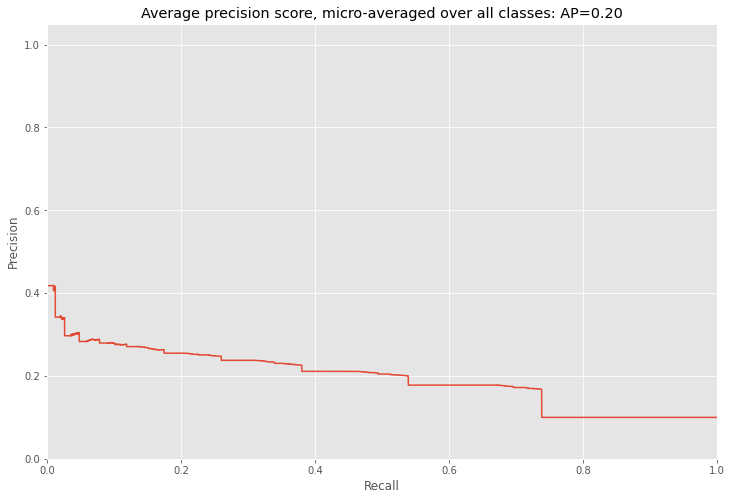

In [172]:
plt.figure(figsize=(12, 8))
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

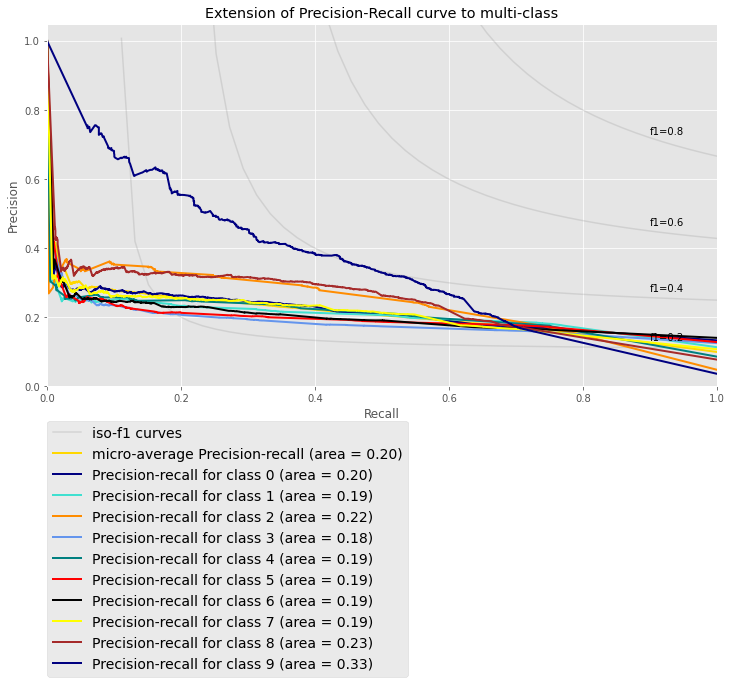

In [179]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 
                'turquoise', 
                'darkorange', 
                'cornflowerblue', 
                'teal',
                'red',
               'black',
               'yellow',
               'brown'])

plt.figure(figsize=(12, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.8), prop=dict(size=14))


plt.show()

### Multi-label ROC curves

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [191]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from numpy import interp

In [180]:
y = pd.cut(pd.Series(stats.boxcox(df.reportable_comp)[0]),
        bins=breaks_box_cox,
        include_lowest=True).cat.codes

In [181]:
# Use label_binarize to be multi-label like settings

y = label_binarize(y, classes=y.unique())
n_classes = y.shape[1]

In [182]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

In [185]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

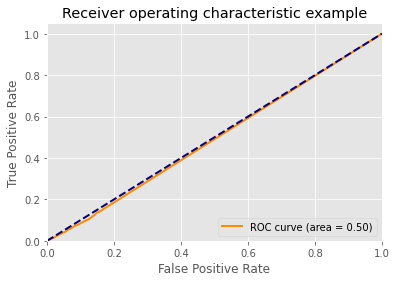

In [207]:
# plot ROC curve for specific classes
plt.figure()
lw = 2
plt.plot(fpr[9], tpr[9], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

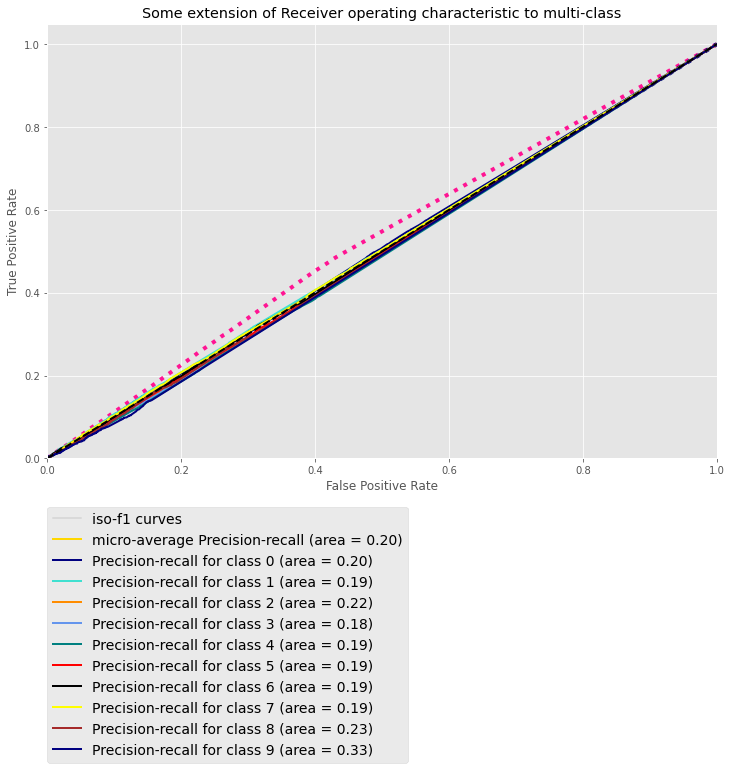

In [210]:
# plot all classes together
lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['navy', 
                'turquoise', 
                'darkorange', 
                'cornflowerblue', 
                'teal',
                'red',
               'black',
               'yellow',
               'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(lines, labels, loc=(0, -.7), prop=dict(size=14))
plt.show()

## Summary Results
<a id='results'></a>